In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:
df = pd.read_csv("data.csv")
df.head()

,Weight,Height
0,120,45
1,135,58
2,123,48
3,145,60
4,160,70


Text(0, 0.5, 'Height')

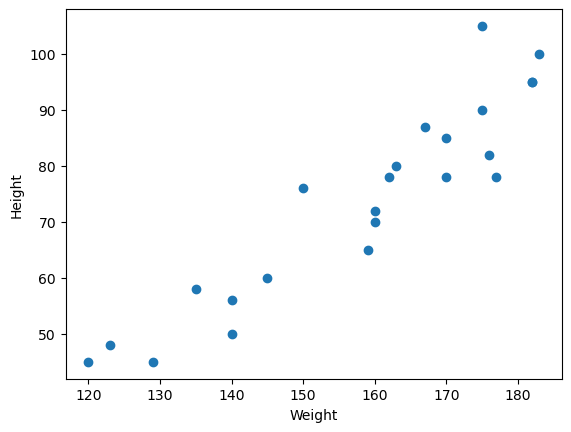

In [4]:
plt.scatter(df["Weight"], df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
# Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


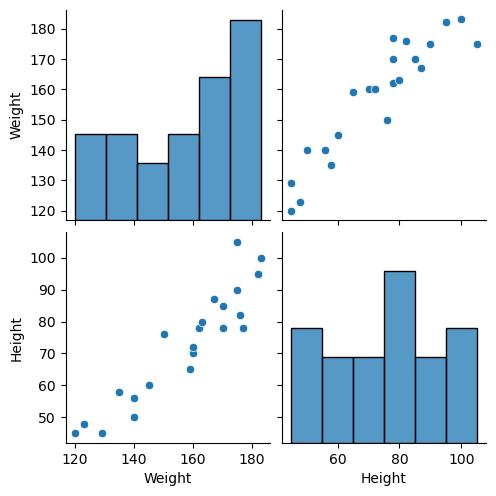

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
## Multicollinearity - check correlation between independent variables in case of multiple linear regression

In [8]:
# dependent and independent variables
# independent feature should be Data Frame or 2D array
X=df["Weight"]
print(type(X))
print(X.shape)
X=df[["Weight"]]
print(type(X))
print(X.shape)

<class 'pandas.core.series.Series'>
(23,)
<class 'pandas.core.frame.DataFrame'>
(23, 1)


In [9]:
# dep variable in Series or 1D array
y=df["Height"]
print(y.shape)

(23,)


In [10]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)

(17, 1)


In [11]:
# Standardization: applied to indep var, mean = 0 and std dev = 1, z_score = (x-mu)/sigma
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
## Simple Linear Regression using Gradient Descent
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [13]:
print(regression.coef_)
print(regression.intercept_)

[15.84018607]
72.47058823529412


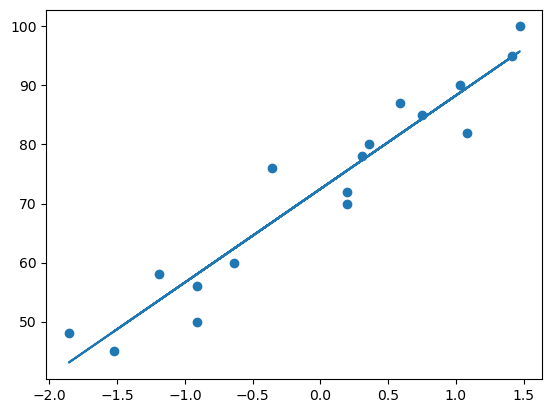

In [14]:
# Plot training data and best fit line
y_train_predict=regression.predict(X_train)
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_predict)

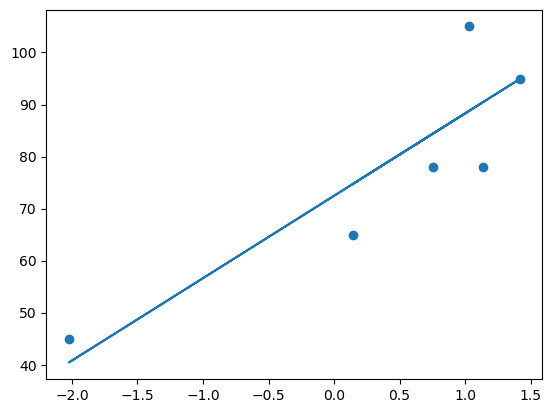

In [15]:
 # prediction on test data
y_test_predict=regression.predict(X_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_predict)

In [16]:
# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_test_predict)
mae=mean_absolute_error(y_test,y_test_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

95.97176782989375
8.247128517477355
9.796518148296045


In [17]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_test_predict)
print(r2)

0.7469247259100369


In [18]:
adj_r2=(1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(adj_r2)

0.6836559073875461


In [19]:
# Linear Regression using OLS
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()
y_test_predict_OLS=model.predict(X_test)
print(y_test_predict_OLS)

[ 18.03952762  11.8885139  -32.04729835  22.43310884   2.22263521
  16.28209513]


In [20]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.045
Model:                            OLS   Adj. R-squared (uncentered):             -0.014
Method:                 Least Squares   F-statistic:                             0.7613
Date:                Mon, 19 May 2025   Prob (F-statistic):                       0.396
Time:                        05:54:47   Log-Likelihood:                         -96.971
No. Observations:                  17   AIC:                                      195.9
Df Residuals:                      16   BIC:                                      196.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\jatin\miniconda3\envs\python-env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [21]:
# Prediction for new data
x=input("Enter the weight for which you want to predict the value:")
x=int(x)
x=[[x]]
x=scaler.transform(x)
predicted_value=regression.predict(x)
print(f"The Predicted value is {predicted_value}")

Enter the weight for which you want to predict the value: 85


The Predicted value is [9.66822131]


C:\Users\jatin\miniconda3\envs\python-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
# Pandas
# Label names - names assigned to rows(index labels) and columns(column labels) in a DataFrame {Here Rows and Columns}
df=pd.DataFrame({"A":[1,2],"B":[3,4]},index=["row1","row2"])
# df=pd.DataFrame({"A":[1,2],"B":[3,4]},index=["row1","row2"],columns=["First","Second"])
df.index.name="Rows"
df.columns.name="Columns"
print(df)

# access elements using loc
print(df.loc["row1","A"])

# Axis - direction of operations in a DataFrame, axis=0/"index" : column-wise operations(collapse the rows),axis-1/"columns": row-wise operations(collapse the columns)
# ex: df.sum(axis=1): computes row sums , df.mean(axis=0): computes column means
df = pd.DataFrame({"A": [1, 2], "B": [3, 4]})
print(df.mean(axis=0))  # Column-wise mean
print(df.sum(axis=1))   # Row-wise sum

# Index - row labels of a DataFrame
df = pd.DataFrame({"A": [10, 20]}, index=["X", "Y"])
print(df.index)  # Output: Index(['X', 'Y'], dtype='object')

Columns  A  B
Rows         
row1     1  3
row2     2  4
1
A    1.5
B    3.5
dtype: float64
0    4
1    6
dtype: int64
Index(['X', 'Y'], dtype='object')


In [23]:
# Multiple Regression
df=pd.read_csv("data2.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [24]:
# drop unnecesary columns
df=df.drop(columns=["Unnamed: 0","year","month"]) # alternative: df.drop(columns=["Unnamed: 0","year","month"],inplace=True)
print(df)

    interest_rate  unemployment_rate  index_price
0            2.75                5.3         1464
1            2.50                5.3         1394
2            2.50                5.3         1357
3            2.50                5.3         1293
4            2.50                5.4         1256
5            2.50                5.6         1254
6            2.50                5.5         1234
7            2.25                5.5         1195
8            2.25                5.5         1159
9            2.25                5.6         1167
10           2.00                5.7         1130
11           2.00                5.9         1075
12           2.00                6.0         1047
13           1.75                5.9          965
14           1.75                5.8          943
15           1.75                6.1          958
16           1.75                6.2          971
17           1.75                6.1          949
18           1.75                6.1          884


In [25]:
# check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

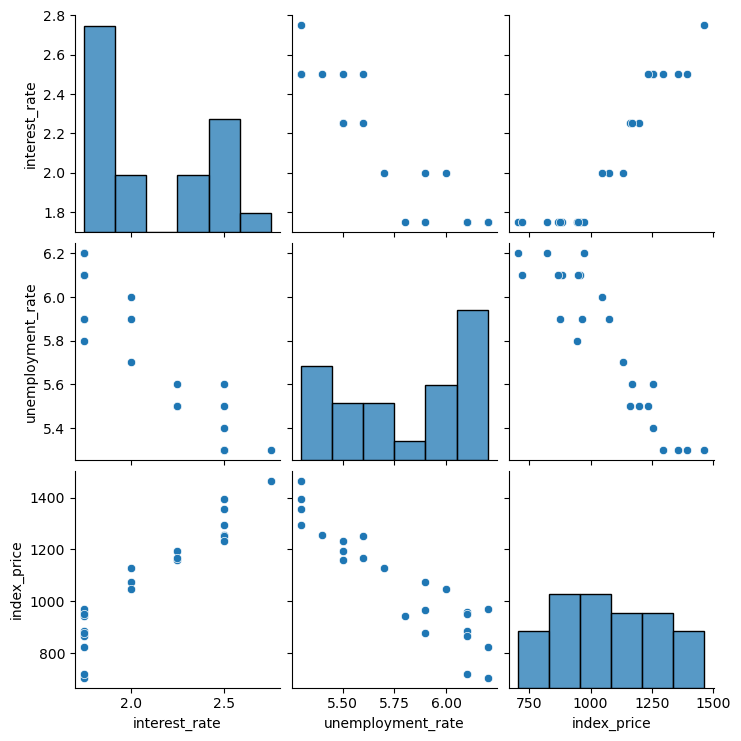

In [26]:
# visualization
sns.pairplot(df)

In [27]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

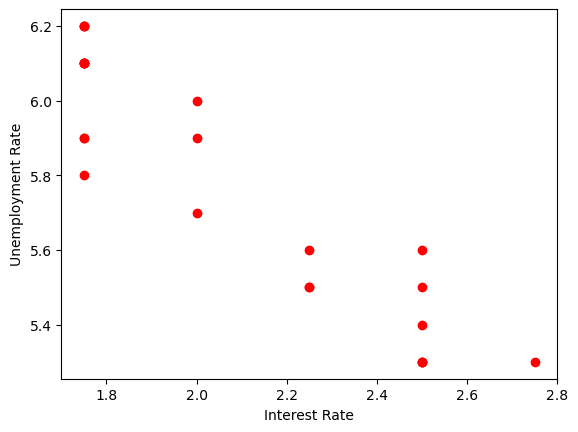

In [28]:
# visualize
plt.scatter(df["interest_rate"],df["unemployment_rate"],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [29]:
# indep and dep var
# df.iloc[rows,cols]
X=df.iloc[:,:-1] # alternate: X=df[["interest_rate","unemployment_rate"]]
y=df.iloc[:,-1] # alternate: y=df["index_price"]
print(X.head())

   interest_rate  unemployment_rate
0           2.75                5.3
1           2.50                5.3
2           2.50                5.3
3           2.50                5.3
4           2.50                5.4


In [30]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

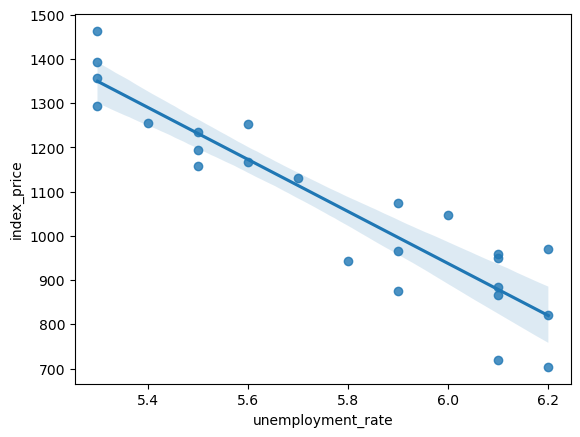

In [31]:
import seaborn as sns # regplot plots the data points and the best fit linear regression line, can be used only for 1 indep var
sns.regplot(x=df["unemployment_rate"],y=df["index_price"])

<Axes: xlabel='interest_rate', ylabel='index_price'>

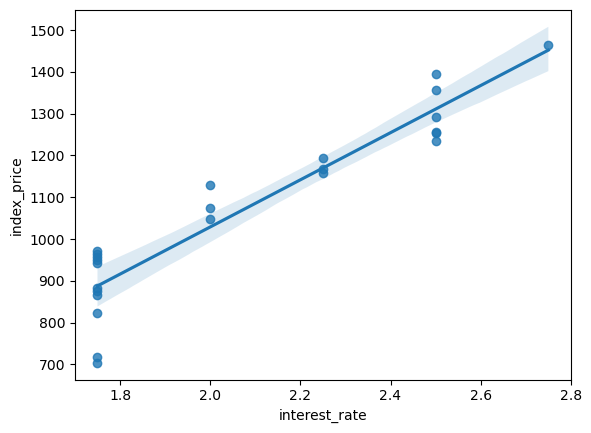

In [32]:
sns.regplot(x=df["interest_rate"],y=df["index_price"])

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)
print(regression.intercept_)
print(regression.coef_)

1053.4444444444443
[  88.27275507 -116.25716066]


In [35]:
# Cross Validating the model
from sklearn.model_selection import cross_val_score
cross_validation_score=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
print(cross_validation_score)
print(np.mean(cross_validation_score))

[-1861.74046551 -8715.8459466  -7707.52362191 -9169.13776461
  -791.32842311]
-5649.115244350757


In [36]:
# Prediction
X_test_predict=regression.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,X_test_predict)
mae=mean_absolute_error(y_test,X_test_predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,X_test_predict)
print(mse)
print(mae)
print(rmse)
print(r2)

5793.762887712575
59.935781523235505
76.11677139574809
0.8278978091457143


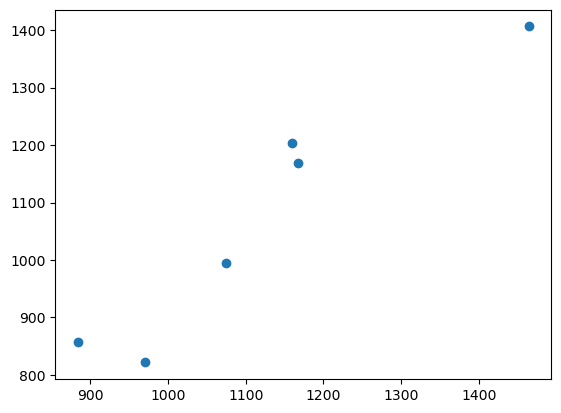

In [37]:
# Assumptions
plt.scatter(y_test,X_test_predict) # as this graph shows a linear shape, hence, our model is good

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


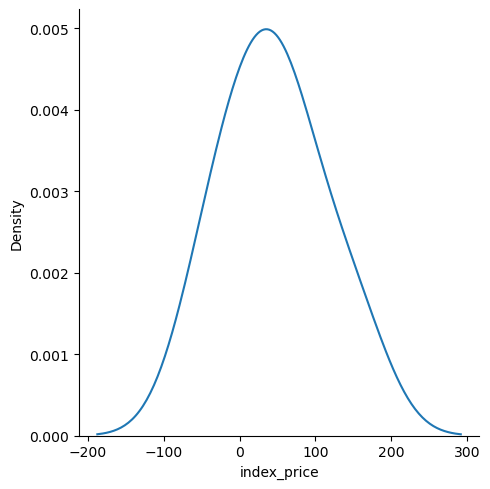

In [38]:
residuals=y_test-X_test_predict
print(residuals)
sns.displot(residuals,kind="kde") # As normal distribution graph is obtained, hence the model is good

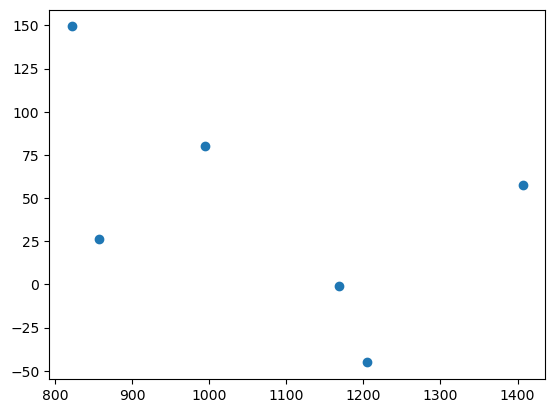

In [39]:
plt.scatter(X_test_predict,residuals) # as this shows a random distribution of points, hence , the model is good

In [40]:
from statsmodels.api import OLS
model=OLS(y_train,X_train).fit()
model.summary()

C:\Users\jatin\miniconda3\envs\python-env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 19 May 2025   Prob (F-statistic):                       0.754
Time:                        05:54:58   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Y')

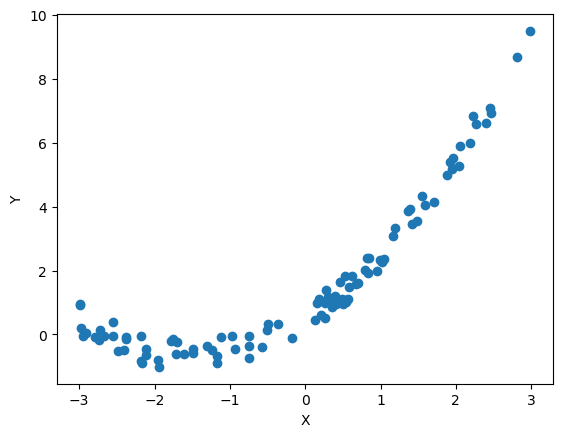

In [41]:
# polynomial regression - regression for non-linear data
X=6*np.random.rand(100,1)-3
y=(0.5*(X**2))+(1.5*X)+np.random.rand(100,1)
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("Y")

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [45]:
X_test_predict=regression.predict(X_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,X_test_predict)
print(r2)

0.6956348335555709


Text(0, 0.5, 'Y')

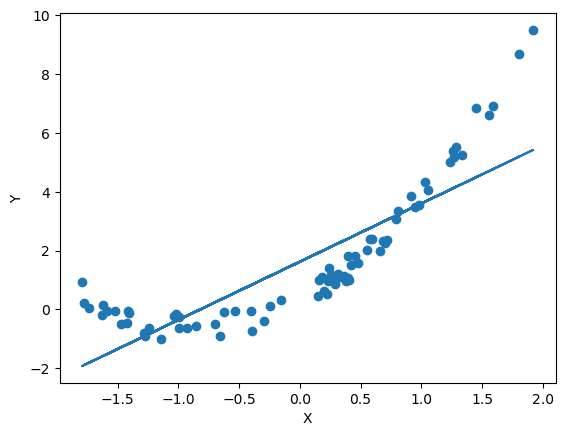

In [46]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.xlabel("X")
plt.ylabel("Y")

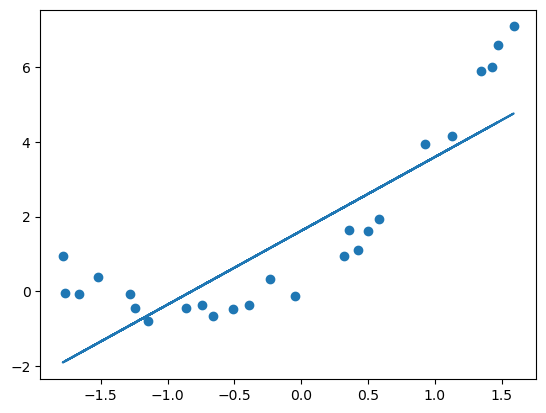

In [47]:
plt.scatter(X_test,y_test)
plt.plot(X_test,X_test_predict)

In [48]:
# applying polynomial regression to obtain a best fit line for non-linear data
# when doing poly regression, we can increase degree to obtain a better fit model however it shouldn't result in overfitting
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
print(X_train_poly)

[[ 1.          0.39387283  0.15513581]
 [ 1.         -1.61957219  2.62301408]
 [ 1.          1.92133844  3.6915414 ]
 [ 1.          0.57339588  0.32878283]
 [ 1.         -1.73934469  3.02531995]
 [ 1.          1.8082039   3.26960136]
 [ 1.          0.14890663  0.02217319]
 [ 1.          0.37949574  0.14401702]
 [ 1.          1.23347094  1.52145056]
 [ 1.         -1.79138639  3.20906519]
 [ 1.          1.59226514  2.53530828]
 [ 1.         -1.27448309  1.62430715]
 [ 1.         -0.99753402  0.99507411]
 [ 1.          1.45031629  2.10341734]
 [ 1.          0.91084407  0.82963692]
 [ 1.          0.19578925  0.03833343]
 [ 1.         -1.4218703   2.02171516]
 [ 1.          0.35022847  0.12265998]
 [ 1.         -0.53290034  0.28398277]
 [ 1.         -0.99301995  0.98608861]
 [ 1.          0.39591999  0.15675264]
 [ 1.          0.68304982  0.46655706]
 [ 1.         -1.47125972  2.16460515]
 [ 1.          0.80775939  0.65247523]
 [ 1.         -1.24614174  1.55286923]
 [ 1.          0.4009492 

In [49]:
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
X_test_predict_poly=regression.predict(X_test_poly)
score=r2_score(y_test,X_test_predict_poly)
print(score)

0.9853348253870031


In [50]:
print(regression.coef_)

[[0.         2.24739244 1.26737073]]


In [51]:
print(regression.intercept_)

[0.35285781]


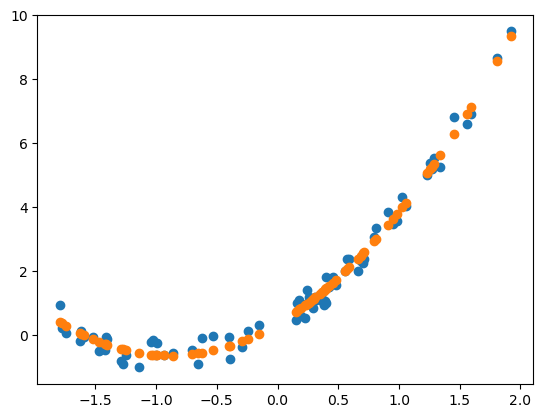

In [52]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regression.predict(X_train_poly))

In [53]:
# increasing the degree
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
X_test_predict_poly=regression.predict(X_test_poly)
score=r2_score(y_test,X_test_predict_poly)
print(score)

0.985368606220058
